In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataframe
df_name = 'Network flow dataframe'
df = pd.read_pickle(df_name)
df

,Port src,Port dst,Bytes,Duration(ms),Mean PIAT(ms),IP_app_converted,Category
0,5353.0,5353.0,169.0,67604.0,67604.000000,3232235888,Network
1,56478.0,443.0,615.0,88.0,12.571429,3232235888,Web
2,45756.0,443.0,1278.0,64149.0,3563.833333,3232235888,Cloud
3,58665.0,3702.0,4886.0,6138.0,1023.000000,3232235881,Network
4,37807.0,443.0,25936.0,195955.0,1749.598214,3232235888,Web
...,...,...,...,...,...,...,...
207,42081.979735,443.0,11197.05498,170332.054218,4761.050806,3232235888,Web
208,39527.812476,443.0,14793.99809,854.537431,36.070522,3232235888,Web
209,56199.65851,443.0,752.374909,94.60658,12.984652,3232235888,Web
210,36788.982573,443.0,13032.556645,1866.736984,77.905930,3232235888,Web


In [3]:
X = df.drop(columns=['Category'])
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### k-NN

In [4]:
import math
from math import sqrt
number = math.sqrt(len (X_train))
nb = int(format(number, ".0f"))
if nb % 2 == 0:
    k = nb - 1 
else:
    k = nb
print ('Le facteur k =',k)

knn = KNeighborsClassifier(3)
parameters_knn = {
    'n_neighbors': (1,k, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}
grid_search_knn = GridSearchCV(estimator=knn,
    param_grid=parameters_knn,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)
import time
start = time.time()
grid_search_knn.fit(X_train, y_train)
stop = time.time()
fitting_time_knn = stop-start
print('fitting_time:', fitting_time_knn)
best_knn = grid_search_knn.best_estimator_
print(best_knn)
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

knn_train_accuracy = format(accuracy_score(y_train, y_train_pred) * 100, ".2f")
knn_test_accuracy =format(accuracy_score(y_test, y_test_pred) *100, ".2f")
knn_f1_score = format(f1_score(y_test, y_test_pred, average='weighted') *100, ".2f")
knn_precision_score = format(precision_score(y_test, y_test_pred, average='weighted')*100, ".2f")
print (knn_train_accuracy,
      knn_test_accuracy,
      knn_f1_score,
      knn_precision_score)

Le facteur k = 13
fitting_time: 4.717026233673096
KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)
100.00 93.02 93.20 94.52


### SVM

In [ ]:
svc = SVC()
parameters_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
                 'decision_function_shape': ['ovo','ovr']}
grid_search_svc = GridSearchCV(estimator= svc, param_grid= parameters_svc, 
                               refit = True, verbose = 3)
start = time.time()
grid_search_svc.fit(X_train, y_train)
stop = time.time()
fitting_time_svc = stop-start
print('fitting_time:', fitting_time_svc)
best_svc = grid_search_svc.best_estimator_
print(best_svc)
y_train_pred = best_svc.predict(X_train)
y_test_pred = best_svc.predict(X_test)

svc_train_accuracy = format(accuracy_score(y_train, y_train_pred)*100, ".2f")
svc_test_accuracy = format(accuracy_score(y_test, y_test_pred)*100, ".2f")
svc_f1_score = format(f1_score(y_test, y_test_pred, average='weighted')*100, ".2f")
svc_precision_score = format(precision_score(y_test, y_test_pred, average='weighted')*100, ".2f")
print (svc_train_accuracy,
      svc_test_accuracy,
      svc_f1_score,
      svc_precision_score)

In [5]:
svc = SVC()
svc.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
svc_train_accuracy = format(accuracy_score(y_train, y_train_pred)*100, ".2f")
svc_test_accuracy = format(accuracy_score(y_test, y_test_pred)*100, ".2f")
svc_f1_score = format(f1_score(y_test, y_test_pred, average='weighted')*100, ".2f")
svc_precision_score = format(precision_score(y_test, y_test_pred, average='weighted')*100, ".2f")
print (svc_train_accuracy,
      svc_test_accuracy,
      svc_f1_score,
      svc_precision_score)

31.95 23.26 13.95 26.98


C:\Users\33634\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [6]:
dt = DecisionTreeClassifier(random_state=1024, max_depth=5)
parameters_dt = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001], 
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= parameters_dt, 
                              cv=5, verbose=True)
start = time.time()
grid_search_dt.fit(X_train, y_train)
stop = time.time()
fitting_time_dt = stop-start
print('fitting_time:', fitting_time_dt)
best_dt = grid_search_dt.best_estimator_
print(best_dt)
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

dt_train_accuracy = format(accuracy_score(y_train, y_train_pred)*100, ".2f")
dt_test_accuracy = format(accuracy_score(y_test, y_test_pred)*100, ".2f")
dt_f1_score = format(f1_score(y_test, y_test_pred, average='weighted')*100, ".2f")
dt_precision_score = format(precision_score(y_test, y_test_pred, average='weighted')*100, ".2f")
print (dt_train_accuracy,
      dt_test_accuracy,
      dt_f1_score, dt_precision_score)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
fitting_time: 2.420253038406372
DecisionTreeClassifier(ccp_alpha=0.01, max_depth=9, max_features='auto',
                       random_state=1024)
97.04 90.70 90.85 92.03


### Random Forest

In [7]:
rfc = RandomForestClassifier()
parameters_rfc = { 
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = parameters_rfc, 
                           cv = 3, n_jobs = -1, verbose = 2) #initialiser la recherche
start = time.time()
grid_search_rfc.fit(X_train, y_train)
end = time.time()
fitting_time_rfc = start-stop
best_rfc = grid_search_rfc.best_estimator_
print(best_rfc)

y_train_pred = best_rfc.predict(X_train)
y_test_pred = best_rfc.predict(X_test)

rfc_train_accuracy = format(accuracy_score(y_train, y_train_pred)*100, ".2f")
rfc_test_accuracy = format(accuracy_score(y_test, y_test_pred)*100, ".2f")
rfc_f1_score = format(f1_score(y_test, y_test_pred, average='weighted')*100, ".2f")
rfc_precision_score = format(precision_score(y_test, y_test_pred, average='weighted')*100, ".2f")
print (rfc_train_accuracy,
      rfc_test_accuracy,
      rfc_f1_score, rfc_precision_score)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)
95.86 90.70 90.50 91.48


,Train Accuracy,Test Accuracy,Precision
k-NN,100.00,93.02,94.52
SVC,31.95,23.26,26.98
DT,97.04,90.70,92.03
RF,95.86,90.70,91.48


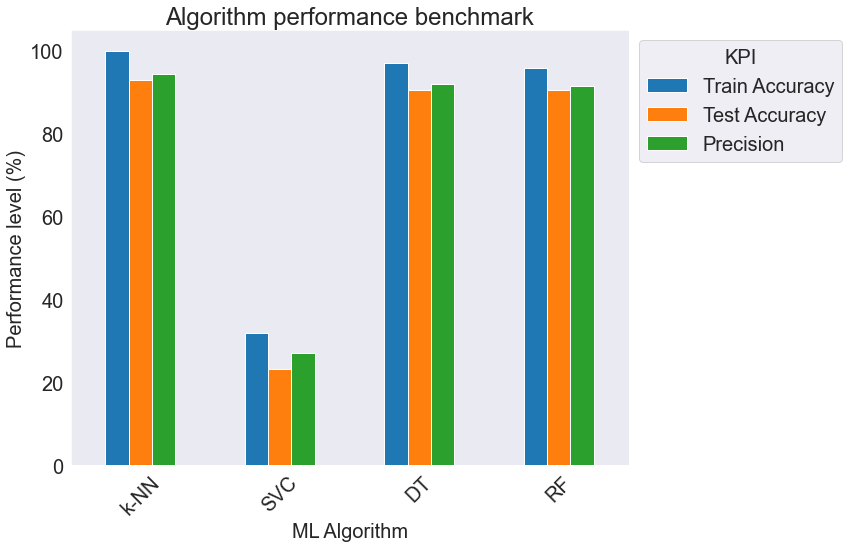

In [14]:
df = pd.DataFrame({'Train Accuracy': [knn_train_accuracy,svc_train_accuracy ,dt_train_accuracy , rfc_train_accuracy],
                   'Test Accuracy': [knn_test_accuracy, svc_test_accuracy, dt_test_accuracy,rfc_test_accuracy],
                   'Precision': [knn_precision_score,svc_precision_score,dt_precision_score,rfc_precision_score]}, index =['k-NN', 'SVC', 'DT', 'RF'])

df['Train Accuracy']=df['Train Accuracy'].astype(float)
df['Test Accuracy']=df['Test Accuracy'].astype(float)
df['Precision']=df['Precision'].astype(float)
#plot columns on bar chart
sns.set_style("dark")
df[['Train Accuracy', 'Test Accuracy','Precision' ]].plot(kind='bar', xlabel = 'ML Algorithm', figsize=(10,8), 
                                                                      ylabel = 'Performance level (%)',
                                                                      title = 'Algorithm performance benchmark').legend(bbox_to_anchor=(1.0, 1.0),
                                                                    title="KPI",
                                                                    fontsize = 20)

plt.xticks(rotation=45, horizontalalignment="center", fontsize = 20)
df 